https://www.kaggle.com/c/titanic  <br>
The link to the titanic project is above <br>
The goal is to predict the survival of each passenger 
based on the age, class,gender, etc info in the dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()
# lots missing in cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Questions that needs to be answered. <br> <br>
1) who are the passengers in terms of age, gender, etc 
<font color='red'> Bar chart for discrete variables such as gender and gender by other discrete variables such as Pclass. Then histogram and kde plot for age by gender, person, and class variables</font>  
<br>
2) what deck were they are and how it was related to their class  <br>

<font color='red'> Deck information needs to substring the Cabin column, and do bar chart</font> 
<br>

3)where did they come from <br>
<font color = 'red'> Embarked has the abbreviation for the port city where people got on. Bar chart by Pclass to see the ses make up of the place where people came from/boarde</font> 
<br>

4)who was alone or with family(columns: SibSp,Parch) <br> <br>

finally we'll ask <br>
5) what factors help survival

In [4]:
# q1) who are the passengers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

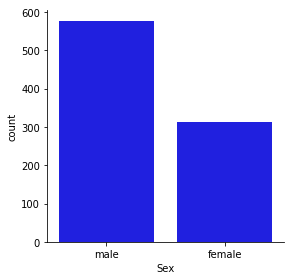

In [10]:
sns.factorplot(x='Sex', data=titanic_df, kind = 'count', color ='blue')
# more males on board

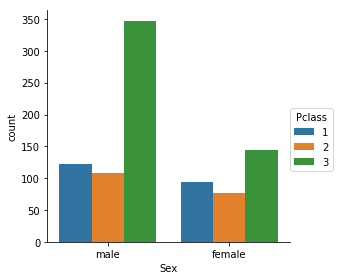

In [13]:
# check the count of each gender by class
sns.factorplot(x='Sex',data=titanic_df,kind = 'count',hue='Pclass')
# more male than female in thrid class
# most males are in the third class

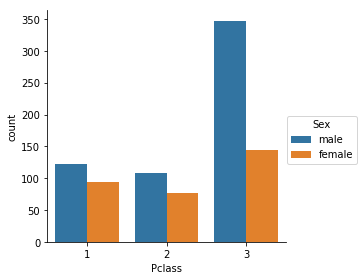

In [15]:
# exchange the pclass with sex
sns.factorplot(x ='Pclass',data = titanic_df,kind = 'count',hue='Sex')
# this shows it more clearly that most males are in the third class
# while for women, they are spread out more evenly

In [39]:
# children, women come frist. 
# want to look at children
# define a method to flag children when age<16
def male_female_child(passenger): # taken passenger as input an object
    age,sex = passenger #take age and gender
    
    if age < 16:
        return 'child'
    else:
        return sex

In [40]:
# now apply the function above L45
# define a new col called person
titanic_df['person']  = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [22]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<a id='person_by_class'></a>

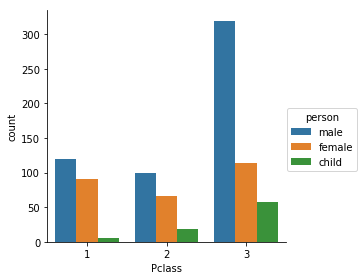

In [44]:
sns.factorplot(x= 'Pclass',data = titanic_df,hue='person', kind = 'count')
# lots of children in third class not many in the first

the proportion of female and children are much higher in the first and second classes. 


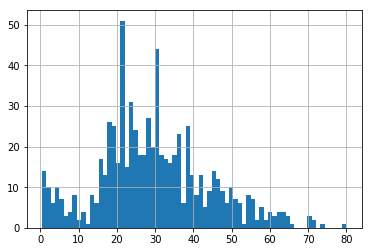

In [43]:
titanic_df['Age'].hist(bins=70)

In [29]:
titanic_df.Age.mean()


29.69911764705882

In [37]:
#titanic_df['person'].groupby(titanic_df['person']).count()

person
child      83
female    271
male      537
Name: person, dtype: int64

In [38]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

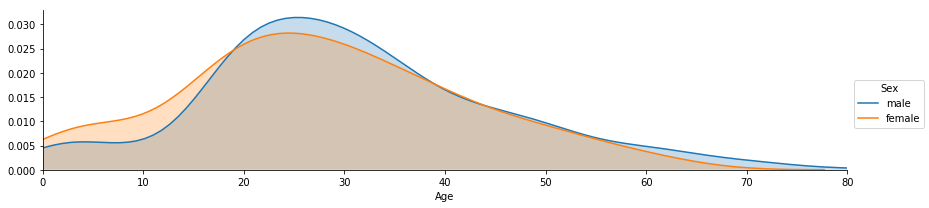

In [41]:
# kde plot for age by gender
# use FacetGrid to have multiple plots overlaid on each other.

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue = 'Sex',aspect =4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

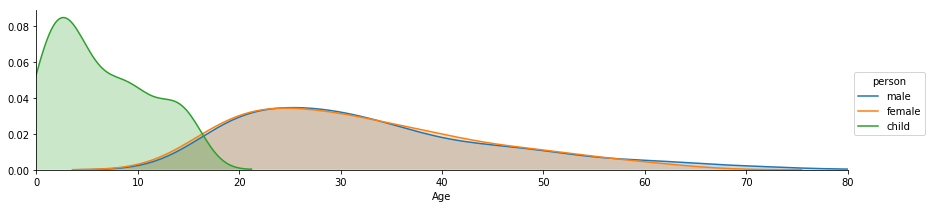

In [42]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue = 'person',aspect =4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

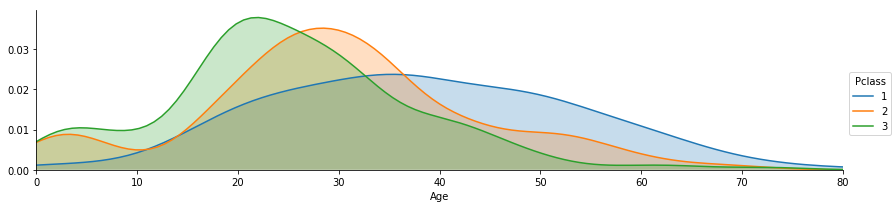

In [43]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect =4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [122]:
# deck
deck = titanic_df['Cabin'].dropna()

In [123]:
type(deck)

pandas.core.series.Series

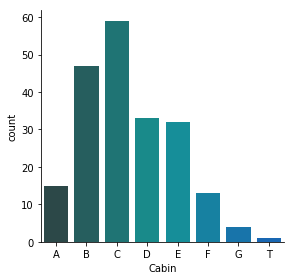

In [53]:
# need only the first letter to know deck
levels = []

for level in deck:
    levels.append(level[0])
#each element in deck is a str, and its first character is needed and appended to the list

# levels is a list of all deck letters
cabin_df=DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',order = ['A','B','C','D','E','F','G','T'],data = cabin_df,kind = 'count',palette='winter_d')
# about palette -- look at matlibplot
# https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

# Cabin T doesn't make sense drop it.


In [54]:
cabin_df = cabin_df[cabin_df.Cabin <> 'T']

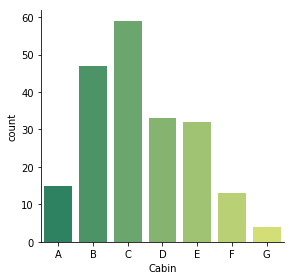

In [55]:
sns.factorplot('Cabin',order = ['A','B','C','D','E','F','G'],data = cabin_df,kind = 'count',palette='summer')


In [69]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


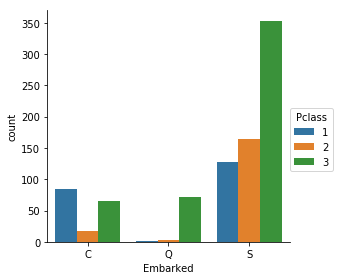

In [5]:
sns.factorplot('Embarked',order = ['C','Q','S'],data = titanic_df,hue = 'Pclass', kind = 'count')


In [6]:
# can see that S has more from the third class embarked there.


In [8]:
# who was alone or with family?
# make a new column if alone (Sibsp =0 and Parch=0)
titanic_df['alone'] = titanic_df.SibSp + titanic_df.Parch

In [10]:
titanic_df['alone'].loc[titanic_df['alone'] >0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone'] ==0] = 'Alone'

In [11]:
titanic_df['alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

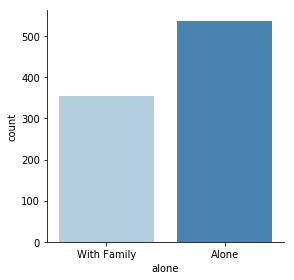

In [16]:
sns.factorplot('alone',data = titanic_df,kind = 'count',palette = 'Blues')

In [28]:
# what factors help survival
# create a new column by mapping to a dictionary L36
titanic_df['survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})


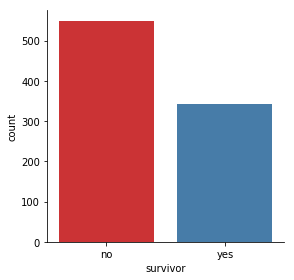

In [29]:
sns.factorplot(x='survivor',data = titanic_df,kind = 'count', palette = 'Set1')

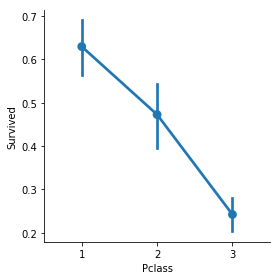

In [38]:
# Pclass?
sns.factorplot('Pclass','Survived',data= titanic_df)

look at [person by class](#person_by_class)<br>
one might wonder if the higher survival rates in 1st and 2nd class was mainly/only due to the higher proportion of women and children in those classes. The effect of class may be confounded with gender/person. So consider both the effects of gender and class

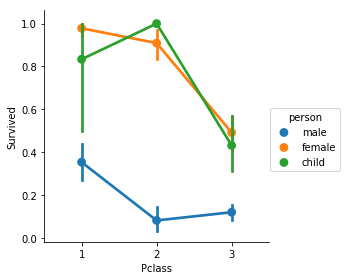

In [41]:
sns.factorplot('Pclass','Survived',hue ='person',data= titanic_df)

whichever class, women and children have higher survival rates than men. But it may not be always the case that the better the class the higher the survival rate.

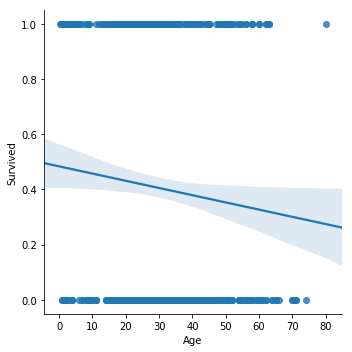

In [45]:
# age?
sns.lmplot('Age','Survived',data= titanic_df)

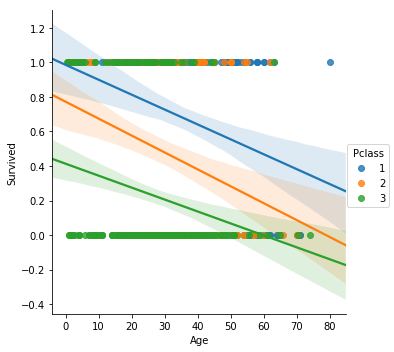

In [46]:
sns.lmplot('Age','Survived',hue = 'Pclass',data= titanic_df)

clean up the plot

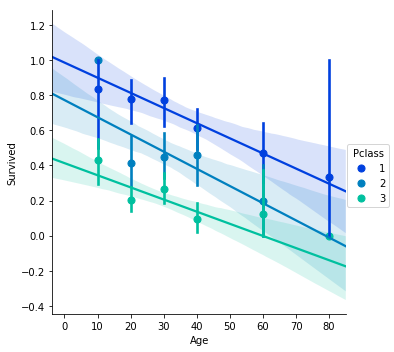

In [47]:
# bins
generations= [10,20,30,40,60,80]
sns.lmplot('Age','Survived',hue ='Pclass',data = titanic_df,palette ='winter',
          x_bins = generations)

Bin the Age variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data <br>

As one can see there's a higher standard deviation of survival amongst older people in the 1st class.

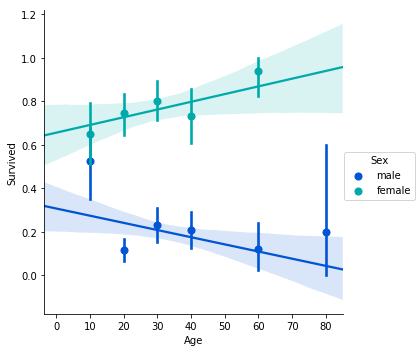

In [49]:
sns.lmplot('Age','Survived',hue = 'Sex',data = titanic_df,
          palette= 'winter',x_bins = generations)

There's a greater chance of survival for older women than men. <br> <br>

The next questions we're gong to look at are: <br>
1) Did the deck have an effect on survival rate? Confound with gender? Does this match up with one's intuition? <br>
<font color = 'red'> The deck column needs to be made that takes only the first letter of the column Cabin, which has many nulls in it. And the instances of T should be ignored.</font>

2) Having a family member increases the survival chance??

In [157]:
titanic_df['Deck']= np.nan

In [163]:
titanic_df['Deck'].loc[titanic_df['Cabin'].isnull()==False] = titanic_df['Cabin'].astype(str).str[0]
titanic_df['Deck'].loc[titanic_df['Deck']=='T']=np.nan

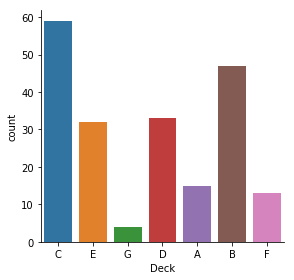

In [164]:
sns.factorplot('Deck',data = titanic_df,kind = 'count')

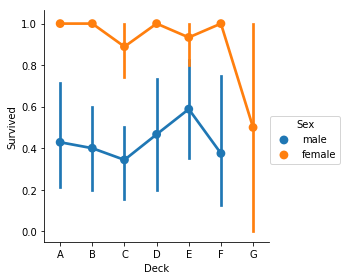

In [173]:
sns.factorplot('Deck','Survived',hue = 'Sex',data= titanic_df,order = ['A','B','C','D','E','F','G'])

There's no clear pattern how deck affects one's survival rate.

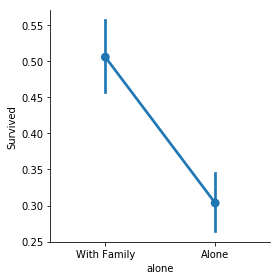

In [178]:
sns.factorplot('alone','Survived',data = titanic_df)

Those with family has a higher survival rate than those alone

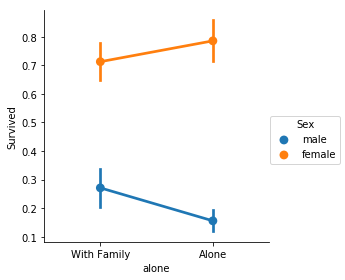

In [179]:
sns.factorplot('alone','Survived',hue = 'Sex',data = titanic_df)

But women, it's the opposite, if you're alone you're more likley to survive than if with family, but with higher standard deviation.

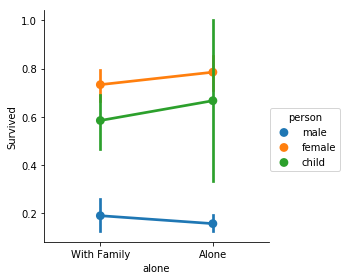

In [180]:
sns.factorplot('alone','Survived',hue = 'person',data = titanic_df)

The same can be said about children, but those children who are alone has a greater standard deviation in their survival rates